In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
df = pd.read_csv("Advertising.csv")
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [5]:
df.shape

(200, 5)

In [8]:
df_mmm = df.copy().drop(['Unnamed: 0'], axis=1)

<AxesSubplot:>

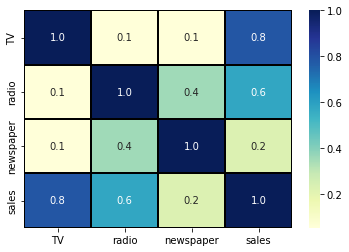

In [10]:
corr = df_mmm.corr()
sns.heatmap(corr,
            fmt='.1f',
            linewidth=0.2,
            linecolor='black',
            annot = True,
            cmap="YlGnBu" 
            )

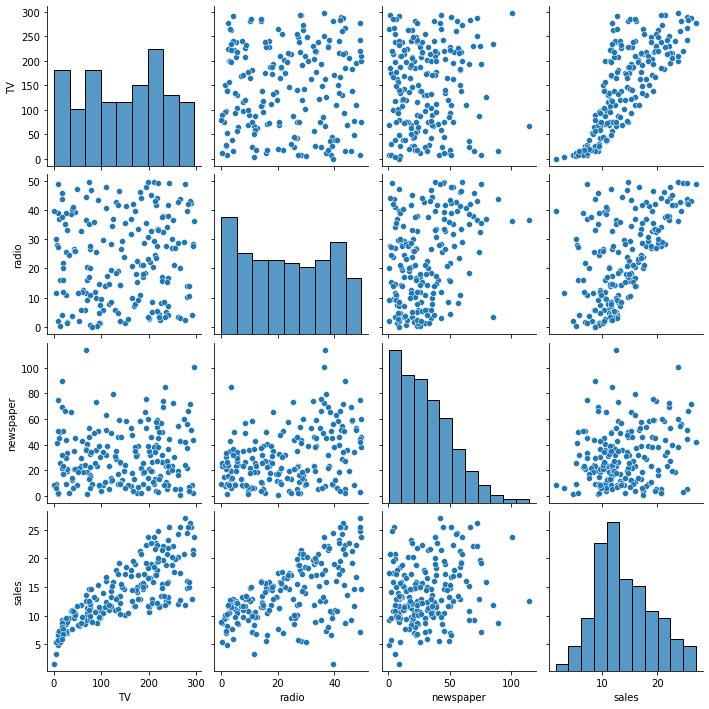

In [11]:
sns.pairplot(df_mmm)

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse

In [13]:
X = df_mmm.loc[:, df_mmm.columns != 'sales']
y = df_mmm['sales']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

In [15]:
X.head(5)

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [17]:
y.head(5)

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [18]:
model = RandomForestRegressor(random_state=1)

In [19]:
model.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

In [20]:
y_pred = model.predict(X_test)

In [28]:
rms = mse(y_test, y_pred, squared=False)
rms
#print('rms')

0.993367343936773

In [21]:
import statsmodels.formula.api as sm
modelA = sm.ols(formula="sales~TV+radio+newspaper", data=df_mmm).fit()
modelB = sm.ols(formula="sales~TV+radio+newspaper", data=df_mmm).fit()
print(modelA.summary())
print(modelB.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 18 Feb 2022   Prob (F-statistic):           1.58e-96
Time:                        09:00:33   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

<AxesSubplot:>

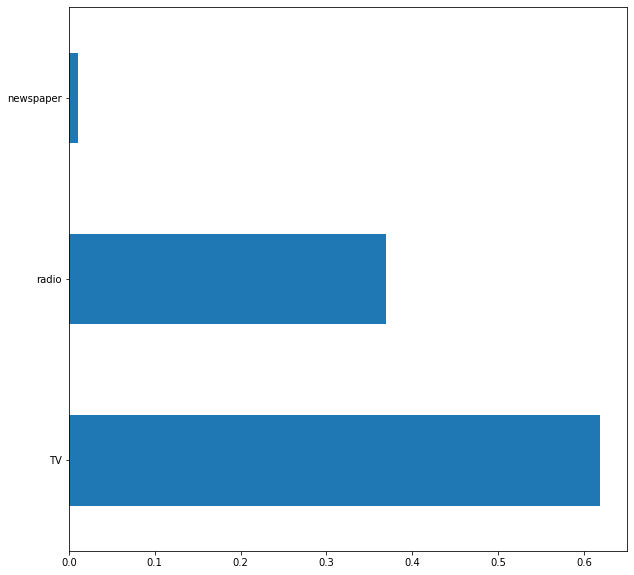

In [22]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

In [31]:
df_mmm['sales']

(200,)

In [34]:
y_pred.shape

(50,)

In [35]:
y.shape

(200,)

In [36]:
y_pred_all = model.predict(X)

In [37]:
df_temp = pd.DataFrame({'actual sales': y, 'predicted sales': y_pred_all})
df_temp.head(5)

,actual sales,predicted sales
0,22.1,21.953
1,10.4,10.977
2,9.3,8.674
3,18.5,18.374
4,12.9,14.371


In [39]:
df_temp.shape

(200, 2)

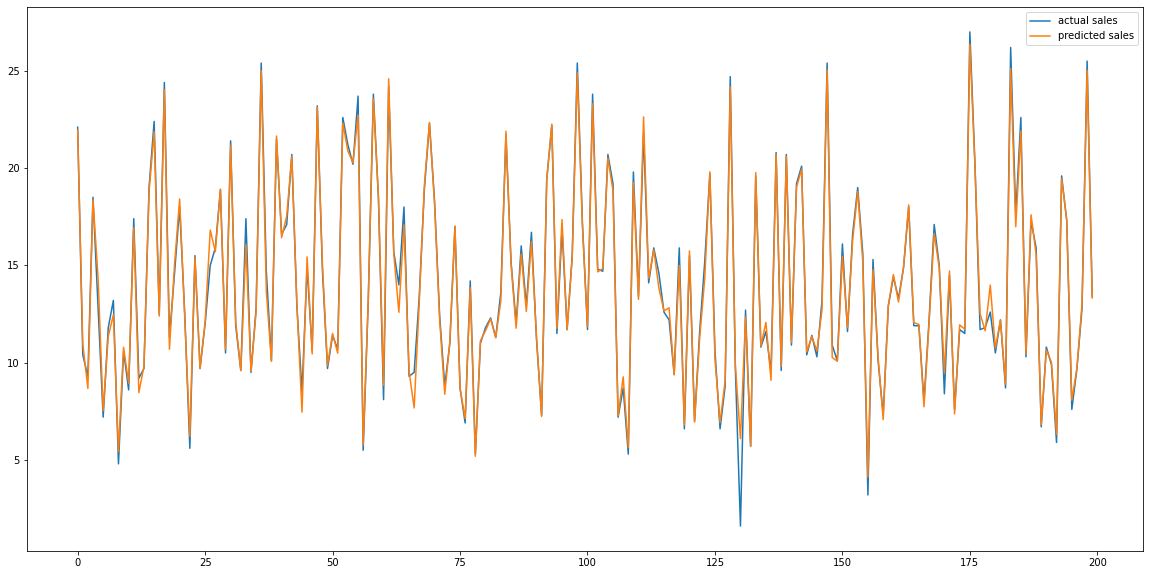

In [52]:
fig, ax = plt.subplots(figsize=(20,10))

df_temp['actual sales'].plot()
df_temp['predicted sales'].plot()
plt.legend()
plt.show()

#ax.set(label = 'actual', label = 'predicted');

In [54]:
from pycaret.regression import *

In [55]:
mmm = setup(df_mmm, target='sales')

,Description,Value
0,session_id,4491
1,Target,sales
2,Original Data,"(200, 4)"
3,Missing Values,False
4,Numeric Features,3
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(139, 3)"


In [57]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.4160,0.3786,0.5619,0.9855,0.0644,0.0544,0.3630
xgboost,Extreme Gradient Boosting,0.6510,0.7179,0.8334,0.9680,0.0800,0.0675,3.7950
gbr,Gradient Boosting Regressor,0.6018,0.6926,0.8067,0.9679,0.0851,0.0715,0.0480
rf,Random Forest Regressor,0.6621,0.7380,0.8438,0.9658,0.0861,0.0713,0.4230
dt,Decision Tree Regressor,0.8747,1.2621,1.0956,0.9414,0.0906,0.0773,0.0120
ada,AdaBoost Regressor,0.9140,1.3300,1.1372,0.9406,0.1063,0.0941,0.0730
lightgbm,Light Gradient Boosting Machine,0.9473,1.7765,1.2645,0.9349,0.1320,0.1169,0.0210
knn,K Neighbors Regressor,1.3104,2.9919,1.6513,0.8787,0.1301,0.1225,0.0670
lasso,Lasso Regression,1.3467,3.2352,1.7512,0.8594,0.1770,0.1620,0.0110
en,Elastic Net,1.3461,3.2287,1.7503,0.8592,0.1782,0.1625,0.0190


/home/svam/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: The outputs_2d_ attribute is deprecated in version 0.22 and will be removed in version 0.24. It is equivalent to n_outputs_ > 1.
  warnings.warn(msg, category=FutureWarning)
/home/svam/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/svam/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/svam/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/svam/.local/lib/python3.7/site-packages/sk

In [58]:
print(best)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=4491, verbose=0, warm_start=False)


In [59]:
et = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.3520,0.2021,0.4495,0.9917,0.0674,0.0521
1,0.2660,0.1138,0.3374,0.9905,0.0288,0.0227
2,0.5127,0.4461,0.6679,0.9872,0.0425,0.0363
3,0.3552,0.1799,0.4241,0.9955,0.0279,0.0232
4,0.4294,0.2881,0.5367,0.9671,0.0390,0.0347
5,0.3414,0.1935,0.4399,0.9953,0.0353,0.0275
6,0.3161,0.1387,0.3724,0.9935,0.0352,0.0300
7,0.5551,0.3647,0.6039,0.9831,0.0652,0.0612
8,0.4219,0.2822,0.5312,0.9882,0.0307,0.0291
9,0.6100,1.5769,1.2558,0.9627,0.2724,0.2272


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


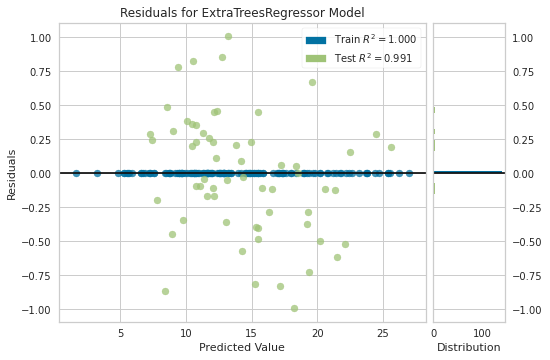

In [60]:
plot_model(et)

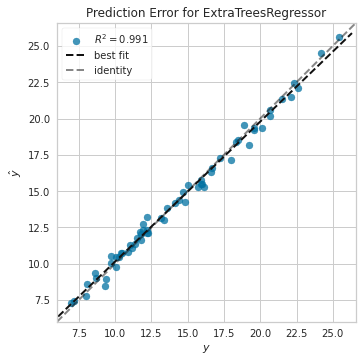

In [61]:
plot_model(et, plot='error')

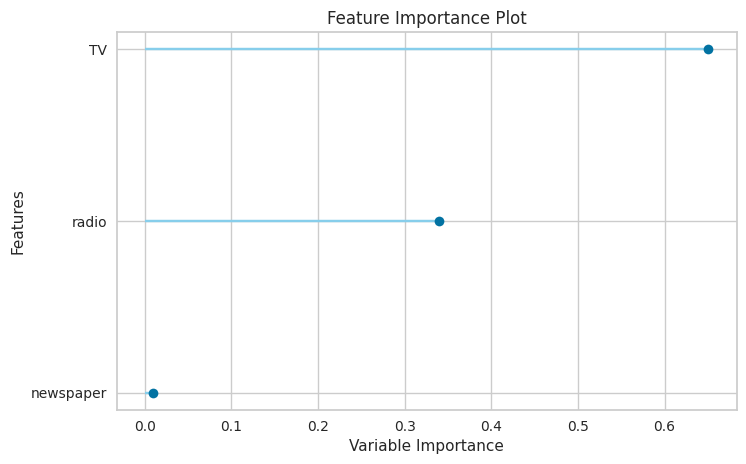

In [62]:
plot_model(et, plot='feature')

In [63]:
predict_model(et)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.3570,0.1950,0.4416,0.9907,0.0324,0.0277


,TV,radio,newspaper,sales,Label
0,239.300003,15.500000,27.299999,15.700000,15.303
1,149.800003,1.300000,24.299999,10.100000,10.460
2,175.699997,15.400000,2.400000,14.100000,14.193
3,197.600006,23.299999,14.200000,16.600000,16.312
4,76.400002,0.800000,14.800000,9.400000,8.952
...,...,...,...,...,...
56,187.899994,17.200001,17.900000,14.700000,14.927
57,239.800003,4.100000,36.900002,12.300000,12.134
58,120.199997,19.600000,11.600000,13.200000,13.152
59,110.699997,40.599998,63.200001,16.000000,15.513
